In [20]:
#Imports
import os
import csv
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set(color_codes=True)
from scipy import stats

In [21]:
salary_file = "salary_data.csv"

In [22]:

salary_file_df= pd.read_csv(salary_file,encoding="ISO-8859-1" )
salary_file_df.set_index('Player')
salary_file_df=salary_file_df.dropna(axis=1,how='all')
salary_file_df['Salary']=salary_file_df[salary_file_df.columns[1:]].replace('[\$,]', '', regex=True).astype(float)
salary_file_df

,Player,Salary
0,Stephen Curry,34682550.0
1,LeBron James,33285709.0
2,Paul Millsap,30769231.0
3,Gordon Hayward,29727900.0
4,Blake Griffin,29512900.0
5,Kyle Lowry,28903704.0
6,Mike Conley,28530608.0
7,James Harden,28299399.0
8,Russell Westbrook,28299399.0
9,DeMar DeRozan,27739975.0


In [23]:
####PER STUFF player_PER.csv
PER_File = "player_PER.csv"
PER_df = pd.read_csv(PER_File,encoding="ISO-8859-1" )
PER_df.set_index('PLAYER')
PER_df=PER_df.dropna(axis=0,how='all')

PER_df

,RK,PLAYER,GP,MPG,TS%,AST,TO,USG,ORR,DRR,REBR,PER,VA,EWA,TEAM
0,49.0,John Wall,41.0,34.4,0.515,29.7,11.9,30.3,1.8,10.2,6.0,19.20,172.5,5.8,WAS
1,56.0,Bradley Beal,82.0,36.3,0.564,16.7,9.6,26.8,2.3,11.5,6.9,18.51,355.7,11.9,WAS
2,57.0,Otto Porter Jr.,77.0,31.6,0.602,13.4,6.4,17.7,4.8,18.1,11.4,18.37,285.6,9.5,WAS
3,134.0,Tomas Satoransky,73.0,22.5,0.615,36.0,10.4,14.8,5.0,11.1,8.0,15.35,119.0,4.0,WAS
4,151.0,Marcin Gortat,82.0,25.3,0.546,17.1,11.2,15.2,9.9,24.0,17.0,14.70,127.0,4.2,WAS
5,189.0,Mike Scott,76.0,18.5,0.599,11.2,11.0,19.0,4.0,15.8,9.9,13.72,46.7,1.6,WAS
6,201.0,Markieff Morris,73.0,27.0,0.566,14.0,12.5,18.8,4.3,19.2,11.8,13.30,52.8,1.8,WAS
7,237.0,Jodie Meeks,77.0,14.5,0.548,12.7,6.7,18.2,1.5,11.2,6.4,12.44,32.4,1.1,WAS
8,241.0,Ian Mahinmi,77.0,14.9,0.601,11.6,21.9,14.8,13.4,17.4,15.4,12.25,28.2,0.9,WAS
9,248.0,Kelly Oubre Jr.,81.0,27.5,0.534,9.1,8.3,18.3,3.0,15.4,9.2,11.99,49.5,1.6,WAS


In [24]:
combo= pd.merge(PER_df, salary_file_df, left_on='PLAYER', right_on='Player').drop('Player', axis=1)
combo

,RK,PLAYER,GP,MPG,TS%,AST,TO,USG,ORR,DRR,REBR,PER,VA,EWA,TEAM,Salary
0,49.0,John Wall,41.0,34.4,0.515,29.7,11.9,30.3,1.8,10.2,6.0,19.20,172.5,5.8,WAS,18063850.0
1,56.0,Bradley Beal,82.0,36.3,0.564,16.7,9.6,26.8,2.3,11.5,6.9,18.51,355.7,11.9,WAS,23775506.0
2,134.0,Tomas Satoransky,73.0,22.5,0.615,36.0,10.4,14.8,5.0,11.1,8.0,15.35,119.0,4.0,WAS,3000000.0
3,151.0,Marcin Gortat,82.0,25.3,0.546,17.1,11.2,15.2,9.9,24.0,17.0,14.70,127.0,4.2,WAS,12782609.0
4,189.0,Mike Scott,76.0,18.5,0.599,11.2,11.0,19.0,4.0,15.8,9.9,13.72,46.7,1.6,WAS,1709538.0
5,201.0,Markieff Morris,73.0,27.0,0.566,14.0,12.5,18.8,4.3,19.2,11.8,13.30,52.8,1.8,WAS,8000000.0
6,237.0,Jodie Meeks,77.0,14.5,0.548,12.7,6.7,18.2,1.5,11.2,6.4,12.44,32.4,1.1,WAS,3290000.0
7,241.0,Ian Mahinmi,77.0,14.9,0.601,11.6,21.9,14.8,13.4,17.4,15.4,12.25,28.2,0.9,WAS,16000000.0
8,263.0,Tim Frazier,59.0,14.2,0.475,44.5,13.1,14.7,2.4,13.1,7.8,11.32,4.0,0.1,WAS,2000000.0
9,285.0,Jae Crowder,80.0,26.1,0.525,10.9,8.1,14.1,3.2,11.5,7.4,10.44,-33.1,-1.1,UTA,6796117.0


In [25]:
combo.count()
print(type(combo))

<class 'pandas.core.frame.DataFrame'>


In [26]:
test = combo.sort_values('PER', ascending=False)
test

,RK,PLAYER,GP,MPG,TS%,AST,TO,USG,ORR,DRR,REBR,PER,VA,EWA,TEAM,Salary
208,1.0,James Harden,72.0,35.4,0.619,23.2,11.6,35.9,1.8,15.2,8.6,29.87,718.5,23.9,HOU,28299399.0
119,2.0,Anthony Davis,75.0,36.4,0.612,8.4,7.9,27.7,7.7,24.8,16.5,28.98,711.4,23.7,NOP,23775506.0
262,3.0,LeBron James,82.0,36.9,0.621,25.7,11.9,31.7,3.7,22.3,13.1,28.65,819.5,27.3,CLE,33285709.0
219,4.0,Stephen Curry,51.0,32.0,0.675,21.2,10.5,30.0,2.7,14.4,9.0,28.32,421.7,14.1,GSW,34682550.0
139,5.0,Giannis Antetokounmpo,75.0,36.7,0.598,15.9,9.8,29.8,6.7,25.3,16.0,27.37,652.7,21.8,MIL,22471911.0
220,6.0,Kevin Durant,68.0,34.2,0.640,18.6,10.5,29.1,1.6,19.5,11.2,26.05,539.7,18.0,GSW,25000000.0
53,7.0,Damian Lillard,73.0,36.6,0.594,20.6,8.8,30.5,2.6,10.6,6.6,25.19,565.4,18.8,POR,26153057.0
31,8.0,LaMarcus Aldridge,75.0,33.5,0.570,8.5,6.2,27.5,10.8,17.3,14.0,25.12,510.2,17.0,SAS,21461010.0
299,9.0,Kyrie Irving,60.0,32.2,0.610,18.6,8.5,30.3,1.9,10.8,6.4,25.03,404.4,13.5,BOS,18868626.0
130,10.0,Karl-Anthony Towns,82.0,35.6,0.646,11.7,9.3,21.9,9.3,30.9,20.0,24.99,626.6,20.9,MIN,6216840.0


In [27]:
combo.dtypes


RK        float64
PLAYER     object
GP        float64
MPG       float64
TS%       float64
AST       float64
TO        float64
USG       float64
ORR       float64
DRR       float64
REBR      float64
PER       float64
VA        float64
EWA       float64
TEAM       object
Salary    float64
dtype: object

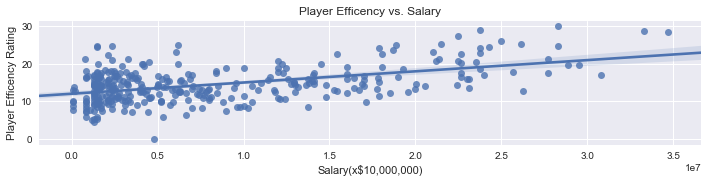

In [38]:
g = sns.lmplot(x="Salary", y="PER", data=combo, aspect =4, size =2.5)
g.set(xlabel='Salary(x$10,000,000)', ylabel='Player Efficency Rating')
plt.title('Player Efficency vs. Salary')
g.savefig("player_eff_vs_PER.png")



In [30]:
#calulate the linear regression r-squared and p.value
slope, intercept, r_value, p_value, std_err = stats.linregress(x=combo["Salary"], y=combo["PER"])
r_squared=r_value**2
print("r_squared = " , r_squared )
print("p_value = ", p_value)

r_squared =  0.24413766171571746
p_value =  6.701931693968078e-22


In [31]:
#AVG TEAM EFFICEncy
team_PER = PER_df.groupby(by=["TEAM"])['PER'].mean()
team_PER

TEAM
ATL    13.528182
BKN    13.388182
BOS    13.978462
CHA    13.794167
CHI    12.400714
CLE    15.681667
DAL    14.689000
DEN    15.315455
DET    14.079167
GSW    16.577333
HOU    15.838333
IND    15.350000
LAC    13.349286
LAL    13.477273
MEM    13.263077
MIA    14.710000
MIL    14.373333
MIN    16.461111
NOP    15.583636
NYK    15.221818
OKC    13.351667
ORL    13.215714
PHI    14.576923
PHX    13.181818
POR    14.260000
SAC    13.744545
SAS    14.574615
TOR    15.818182
UTA    14.984545
WAS    14.650000
Name: PER, dtype: float64

In [32]:
#Win DATA
win_file = "team_win_data.csv"

In [33]:
win_df = pd.read_csv(win_file,encoding="ISO-8859-1" )
win_df

,Team Name,W,L,W/L%,GB,PS/G,PA/G,SRS,conference,Team_Abb
0,Toronto Raptors*Â (1)Â,59,23,0.720,â,111.7,103.9,7.29,East,TOR
1,Boston Celtics*Â (2)Â,55,27,0.671,4,104.0,100.4,3.23,East,BOS
2,Philadelphia 76ers*Â (3)Â,52,30,0.634,7,109.8,105.3,4.30,East,PHI
3,Cleveland Cavaliers*Â (4)Â,50,32,0.610,9,110.9,109.9,0.59,East,CLE
4,Indiana Pacers*Â (5)Â,48,34,0.585,11,105.6,104.2,1.18,East,IND
5,Miami Heat*Â (6)Â,44,38,0.537,15,103.4,102.9,0.15,East,MIA
6,Milwaukee Bucks*Â (7)Â,44,38,0.537,15,106.5,106.8,-0.45,East,MIL
7,Washington Wizards*Â (8)Â,43,39,0.524,16,106.6,106.0,0.53,East,WAS
8,Detroit PistonsÂ (9)Â,39,43,0.476,20,103.8,103.9,-0.26,East,DET
9,Charlotte HornetsÂ (10)Â,36,46,0.439,23,108.2,108.0,0.07,East,CHA


In [34]:
team_avg_per = pd.DataFrame({'TEAM':team_PER.index, 'Avg. PER':team_PER.values})
team_avg_per

,Avg. PER,TEAM
0,13.528182,ATL
1,13.388182,BKN
2,13.978462,BOS
3,13.794167,CHA
4,12.400714,CHI
5,15.681667,CLE
6,14.689000,DAL
7,15.315455,DEN
8,14.079167,DET
9,16.577333,GSW


In [35]:
combo2= pd.merge(win_df, team_avg_per, left_on='Team_Abb', right_on='TEAM').drop('TEAM', axis=1)
combo2

,Team Name,W,L,W/L%,GB,PS/G,PA/G,SRS,conference,Team_Abb,Avg. PER
0,Toronto Raptors*Â (1)Â,59,23,0.720,â,111.7,103.9,7.29,East,TOR,15.818182
1,Boston Celtics*Â (2)Â,55,27,0.671,4,104.0,100.4,3.23,East,BOS,13.978462
2,Philadelphia 76ers*Â (3)Â,52,30,0.634,7,109.8,105.3,4.30,East,PHI,14.576923
3,Cleveland Cavaliers*Â (4)Â,50,32,0.610,9,110.9,109.9,0.59,East,CLE,15.681667
4,Indiana Pacers*Â (5)Â,48,34,0.585,11,105.6,104.2,1.18,East,IND,15.350000
5,Miami Heat*Â (6)Â,44,38,0.537,15,103.4,102.9,0.15,East,MIA,14.710000
6,Milwaukee Bucks*Â (7)Â,44,38,0.537,15,106.5,106.8,-0.45,East,MIL,14.373333
7,Washington Wizards*Â (8)Â,43,39,0.524,16,106.6,106.0,0.53,East,WAS,14.650000
8,Detroit PistonsÂ (9)Â,39,43,0.476,20,103.8,103.9,-0.26,East,DET,14.079167
9,Charlotte HornetsÂ (10)Â,36,46,0.439,23,108.2,108.0,0.07,East,CHA,13.794167


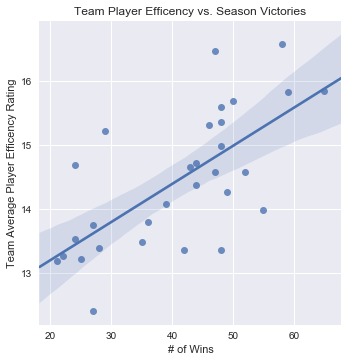

In [43]:
g = sns.lmplot(x="W", y='Avg. PER', data=combo2)
g.set(xlabel='# of Wins', ylabel='Team Average Player Efficency Rating')
plt.title('Team Player Efficency vs. Season Victories')
#West Coast = Best Coast?
g.savefig("team_eff_vs_wins.png")


In [45]:
#calulate the linear regression r-squared and p.value
slope, intercept, r_value, p_value, std_err = stats.linregress(x=combo2["W"], y=combo2["Avg. PER"])
r_squared=r_value**2
print("r_squared = " , r_squared )
print("p_value = ", p_value)

r_squared =  0.46251083668091886
p_value =  3.5610445557188915e-05
